# Gaussian Processes -- AIMS CDT 2020, Michaelmas Week 1
### Dominik Kloepfer

## Import Packages

In [1]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scipy

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [10]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

from gp_methods import posterior_predictive_distr, marg_log_likelihood
import cov_functions
import mean_functions


## Import Data

In [4]:
with open('sotonmet.txt') as input:
    raw_data = [line.strip().split(',') for line in input] #load data into list

known_raw_data = []
missing_raw_data = []

first_timestamp = np.datetime64(raw_data[1][2])

for datapoint in raw_data[1:]:

    # convert datetimes into numpy datetime objects, then calculate time difference to first measurement, then calculate in hours
    datapoint[2] = (np.datetime64(datapoint[2]) - first_timestamp) / np.timedelta64(1, 'h')


    # convert numbers into np.floats
    datapoint[1] = np.float(datapoint[1])
    for i in range(3, len(datapoint)):
        if datapoint[i]:
            datapoint[i] = np.float(datapoint[i])
        else:
            datapoint[i] = np.nan

    # split datapoints into known datapoints and datapoints with missing data
    if np.nan in datapoint:
        missing_raw_data.append(datapoint[2:]) # remove redundant first two columns
    else:
        known_raw_data.append(datapoint[2:]) # remove redundant first two columns

In [5]:
known_data = np.array(known_raw_data)
missing_data = np.array(missing_raw_data)

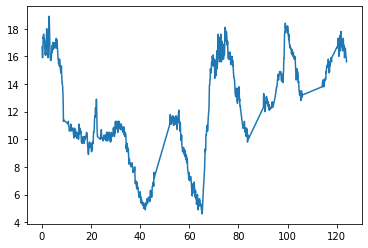

In [38]:
plt.plot(known_data[:, 0], known_data[:, 2])
#plt.plot(known_data[:, 0], known_data[:, 7], '+')


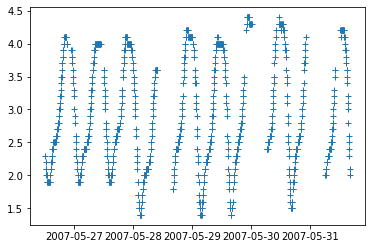

In [10]:
plt.plot(known_data[:, 0], known_data[:, 3], '+')

## Gaussian Process with Fixed Mean and Variance Functions

### Air Temperature

In [8]:
air_temp_mean_f = lambda X: mean_functions.const(X, np.array([np.mean(known_data[:, 2])])) # use mean of known air temperature as prior constant mean

alpha = 1 # very handwavily justified by arguing that the variance of each thing should not be too large
beta = 8 # after eight hours the time of day has changed significantly and there should not be too much correlation anymore -- might make this lower
air_temp_cov_f = lambda X, Y: cov_functions.matern_half(X, Y, np.array([alpha, beta])) # use Matern kernel as covaiance function for Air temperature

X = np.expand_dims(known_data[:, 0], axis=1)
y = np.expand_dims(known_data[:, 2], axis=1)
target_noise = np.zeros_like(y)
jitter = 1e-4

X_star = np.expand_dims(missing_data[:, 0], axis=1)


In [9]:
mean_star, cov_star = posterior_predictive_distr(X, y, target_noise, X_star, air_temp_mean_f, air_temp_cov_f, jitter)

### Tide Height

## Maximum Likelihood Estimation of Hyperparameters

In [100]:
# arguments for gp_log_likelihood
initial_guess = np.array([]) #TODO
n_mean_f_params = #TODO
mean_f = #TODO
cov_f = #TODO
X = #TODO
y = #TODO_
target_noise = #TODO
jitter = 1e-5

best_params = minimize(-marg_log_likelihood, initial_guess, args=(n_mean_f_params, mean_f, cov_f, X, y, target_noise, jitter), options={'disp': True})

### Compute GP with best parameters

In [113]:
best_mean_f = lambda X: mean_f(X, best_params[:n_mean_f_params])
best_cov_f = lambda X, Y: cov_f(X, Y, best_params[n_mean_f_params:]) 

X_star = #TODO

best_mean_star, best_cov_star = posterior_predictive_distr(X, y, target_noise, X_star, best_mean_f, best_cov_f, jitter)

(1, 5)